In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
keio_df = pd.read_csv('../../../野球部データ収集/keio_data/keio.csv', parse_dates=[1])
keio_df

,UserID,TargetDate,Score,DiffRestHrValue,DiffWakedHrValue,StressCount,SleepHours,DeepSleepRate,Step,LowActivityHourws
0,1788,2022-02-18,0,2.0,NaN,0.0,NaN,NaN,51,0.1
1,1788,2022-02-19,35,-1.0,NaN,0.0,NaN,NaN,2762,6.2
2,1788,2022-02-20,51,-0.5,NaN,1.0,NaN,NaN,948,2.2
3,1788,2022-02-21,25,1.5,NaN,0.0,NaN,NaN,14,5.9
4,1788,2022-04-17,0,1.0,NaN,0.0,1.5,0.3,0,5.9
...,...,...,...,...,...,...,...,...,...,...
1550,1773,2022-06-04,3,NaN,NaN,NaN,NaN,NaN,0,0.0
1551,1773,2022-06-05,3,10.0,NaN,0.0,6.4,0.5,1025,2.2
1552,1773,2022-06-06,51,5.2,5.2,0.0,NaN,NaN,310,0.2
1553,1773,2022-06-07,44,5.8,NaN,0.0,6.4,0.5,0,0.0


In [5]:
keio_df.columns

Index(['UserID', 'TargetDate', 'Score', 'DiffRestHrValue', 'DiffWakedHrValue',
       'StressCount', 'SleepHours', 'DeepSleepRate', 'Step',
       'LowActivityHourws'],
      dtype='object')

## アンコントロールな変数のみにする

In [7]:
use_feature_df = keio_df[['UserID', 'TargetDate', 'Score', 'DiffRestHrValue', 'DiffWakedHrValue',
        'StressCount', 'DeepSleepRate', 'LowActivityHourws']]
use_feature_df

,UserID,TargetDate,Score,DiffRestHrValue,DiffWakedHrValue,StressCount,DeepSleepRate,LowActivityHourws
0,1788,2022-02-18,0,2.0,NaN,0.0,NaN,0.1
1,1788,2022-02-19,35,-1.0,NaN,0.0,NaN,6.2
2,1788,2022-02-20,51,-0.5,NaN,1.0,NaN,2.2
3,1788,2022-02-21,25,1.5,NaN,0.0,NaN,5.9
4,1788,2022-04-17,0,1.0,NaN,0.0,0.3,5.9
...,...,...,...,...,...,...,...,...
1550,1773,2022-06-04,3,NaN,NaN,NaN,NaN,0.0
1551,1773,2022-06-05,3,10.0,NaN,0.0,0.5,2.2
1552,1773,2022-06-06,51,5.2,5.2,0.0,NaN,0.2
1553,1773,2022-06-07,44,5.8,NaN,0.0,0.5,0.0


## 選手一人ひとりの特徴量を作成

In [16]:
def create_user_feature(user_id):
    output_df = use_feature_df[use_feature_df['UserID'] == user_id].reset_index(drop=True)
    output_df['TargetDate'] = output_df['TargetDate'].dt.date
    return output_df

In [17]:
users = keio_df['UserID'].unique()
create_user_feature(users[1])

,UserID,TargetDate,Score,DiffRestHrValue,DiffWakedHrValue,StressCount,DeepSleepRate,LowActivityHourws
0,1504,2021-11-01,73,-11.5,-11.0,2.0,NaN,6.3
1,1504,2021-11-02,66,10.9,NaN,8.0,0.4,2.0
2,1504,2021-11-03,55,18.0,-21.1,70.0,0.2,9.8
3,1504,2021-11-04,55,-6.0,0.9,1.0,NaN,10.5
4,1504,2021-11-05,64,-11.1,NaN,0.0,0.4,7.0
...,...,...,...,...,...,...,...,...
161,1504,2022-05-18,91,-3.9,-5.4,0.0,0.4,1.3
162,1504,2022-05-19,85,10.5,-2.3,4.0,0.3,11.6
163,1504,2022-05-20,76,7.5,-3.3,0.0,NaN,3.1
164,1504,2022-05-21,50,-1.7,NaN,1.0,0.4,9.9


## ラベル作成

In [19]:
answer_df = pd.read_csv('../../../野球部データ収集/keio_data/keio_answer_data.csv', parse_dates=[1])
category = pd.read_csv('../../../野球部データ収集/keio_data/category.csv', encoding='shift-jis')
answer_df = answer_df.merge(category)
answer_df

,UserID,TargetDate,category_id,value,category
0,1788,2022-04-20 15:00:00,9,3,体温
1,1788,2022-04-21 15:00:00,9,3,体温
2,1788,2022-04-22 15:00:00,9,3,体温
3,1788,2022-04-23 15:00:00,9,3,体温
4,1788,2022-04-27 15:00:00,9,3,体温
...,...,...,...,...,...
5095,1773,2022-06-01 15:00:00,13,1,朝食
5096,1773,2022-06-05 15:00:00,13,5,朝食
5097,1773,2022-06-06 15:00:00,13,5,朝食
5098,1773,2022-06-07 15:00:00,13,5,朝食


In [26]:
user_id = users[1]
def create_y(user_id):
    _piv_df = answer_df[answer_df['UserID'] == user_id].pivot_table(
        values='value',
        index='TargetDate',
        columns='category'
    ).reset_index()
    _piv_df['TargetDate'] = _piv_df['TargetDate'].dt.date
    _piv_df = _piv_df.drop(['体温', '朝食'], axis=1)
    _piv_df['mean'] = _piv_df.mean(axis=1)
    _piv_df['y'] = _piv_df['mean'].apply(lambda x: 1 if x >= _piv_df['mean'].mean()+_piv_df['mean'].std() else 0)
    for i in ['下肢の状態',	'肘の状態', '肩の状態']:
        _piv_df[f'y_{i}'] = _piv_df[i].apply(lambda x: int(x > 3))
    
    return _piv_df
create_y(user_id)

category,TargetDate,下肢の状態,肘の状態,肩の状態,mean,y,y_下肢の状態,y_肘の状態,y_肩の状態
0,2022-02-17,4,2,1,2.333333,0,1,0,0
1,2022-02-18,3,1,1,1.666667,0,0,0,0
2,2022-02-19,3,2,1,2.000000,0,0,0,0
3,2022-02-20,4,1,1,2.000000,0,1,0,0
4,2022-02-21,4,3,1,2.666667,0,1,0,0
5,2022-02-22,4,3,1,2.666667,0,1,0,0
6,2022-02-23,5,1,1,2.333333,0,1,0,0
7,2022-02-25,4,1,1,2.000000,0,1,0,0
8,2022-02-26,5,1,1,2.333333,0,1,0,0
9,2022-02-27,5,1,1,2.333333,0,1,0,0


In [29]:
X = create_user_feature(user_id)
y = create_y(user_id)
df = pd.merge(X, y, how='inner', on='TargetDate')
df

,UserID,TargetDate,Score,DiffRestHrValue,DiffWakedHrValue,StressCount,DeepSleepRate,LowActivityHourws,下肢の状態,肘の状態,肩の状態,mean,y,y_下肢の状態,y_肘の状態,y_肩の状態
0,1504,2022-02-17,88,-5.0,1.2,1.0,0.3,4.6,4,2,1,2.333333,0,1,0,0
1,1504,2022-02-18,94,-3.5,-5.8,1.0,0.5,7.5,3,1,1,1.666667,0,0,0,0
2,1504,2022-02-19,72,2.5,3.7,1.0,0.4,10.0,3,2,1,2.000000,0,0,0,0
3,1504,2022-02-20,90,17.4,2.4,11.0,0.4,4.2,4,1,1,2.000000,0,1,0,0
4,1504,2022-02-21,63,20.4,12.4,28.0,0.4,6.0,4,3,1,2.666667,0,1,0,0
5,1504,2022-02-22,56,12.4,22.4,35.0,NaN,7.8,4,3,1,2.666667,0,1,0,0
6,1504,2022-02-23,40,10.4,NaN,0.0,0.4,6.0,5,1,1,2.333333,0,1,0,0
7,1504,2022-02-25,54,16.2,NaN,5.0,0.4,3.7,4,1,1,2.000000,0,1,0,0
8,1504,2022-02-26,41,13.2,7.2,12.0,0.4,5.1,5,1,1,2.333333,0,1,0,0
9,1504,2022-02-27,74,-4.5,-2.5,1.0,0.5,5.4,5,1,1,2.333333,0,1,0,0


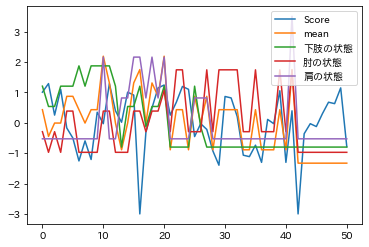

In [37]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import japanize_matplotlib
scaler = StandardScaler()
plt.plot(scaler.fit_transform(df[['Score', 'mean', '下肢の状態', '肘の状態', '肩の状態']]))
plt.legend(['Score', 'mean', '下肢の状態', '肘の状態', '肩の状態'])

In [38]:
df[['Score', 'mean', '下肢の状態', '肘の状態', '肩の状態']].corr()

,Score,mean,下肢の状態,肘の状態,肩の状態
Score,1.000000,0.144755,0.046223,0.155329,0.041642
mean,0.144755,1.000000,0.605186,0.601662,0.646223
下肢の状態,0.046223,0.605186,1.000000,-0.198767,0.230800
肘の状態,0.155329,0.601662,-0.198767,1.000000,0.257657
肩の状態,0.041642,0.646223,0.230800,0.257657,1.000000
